In [2]:
!nvidia-smi

Tue Mar 26 19:11:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xlUXiwPcXpZEOYGaMbNE")
project = rf.workspace("project-yckis").project("fish-jxowb")
version = project.version(19)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [8]:
!yolo task=segment mode=train model=yolov8n-seg.pt data=/content/fish-19/data.yaml epochs=25 imgsz=640 plots=True

100% 6.73M/6.73M [00:00<00:00, 81.4MB/s]
New https://pypi.org/project/ultralytics/8.1.34 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/fish-19/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_w

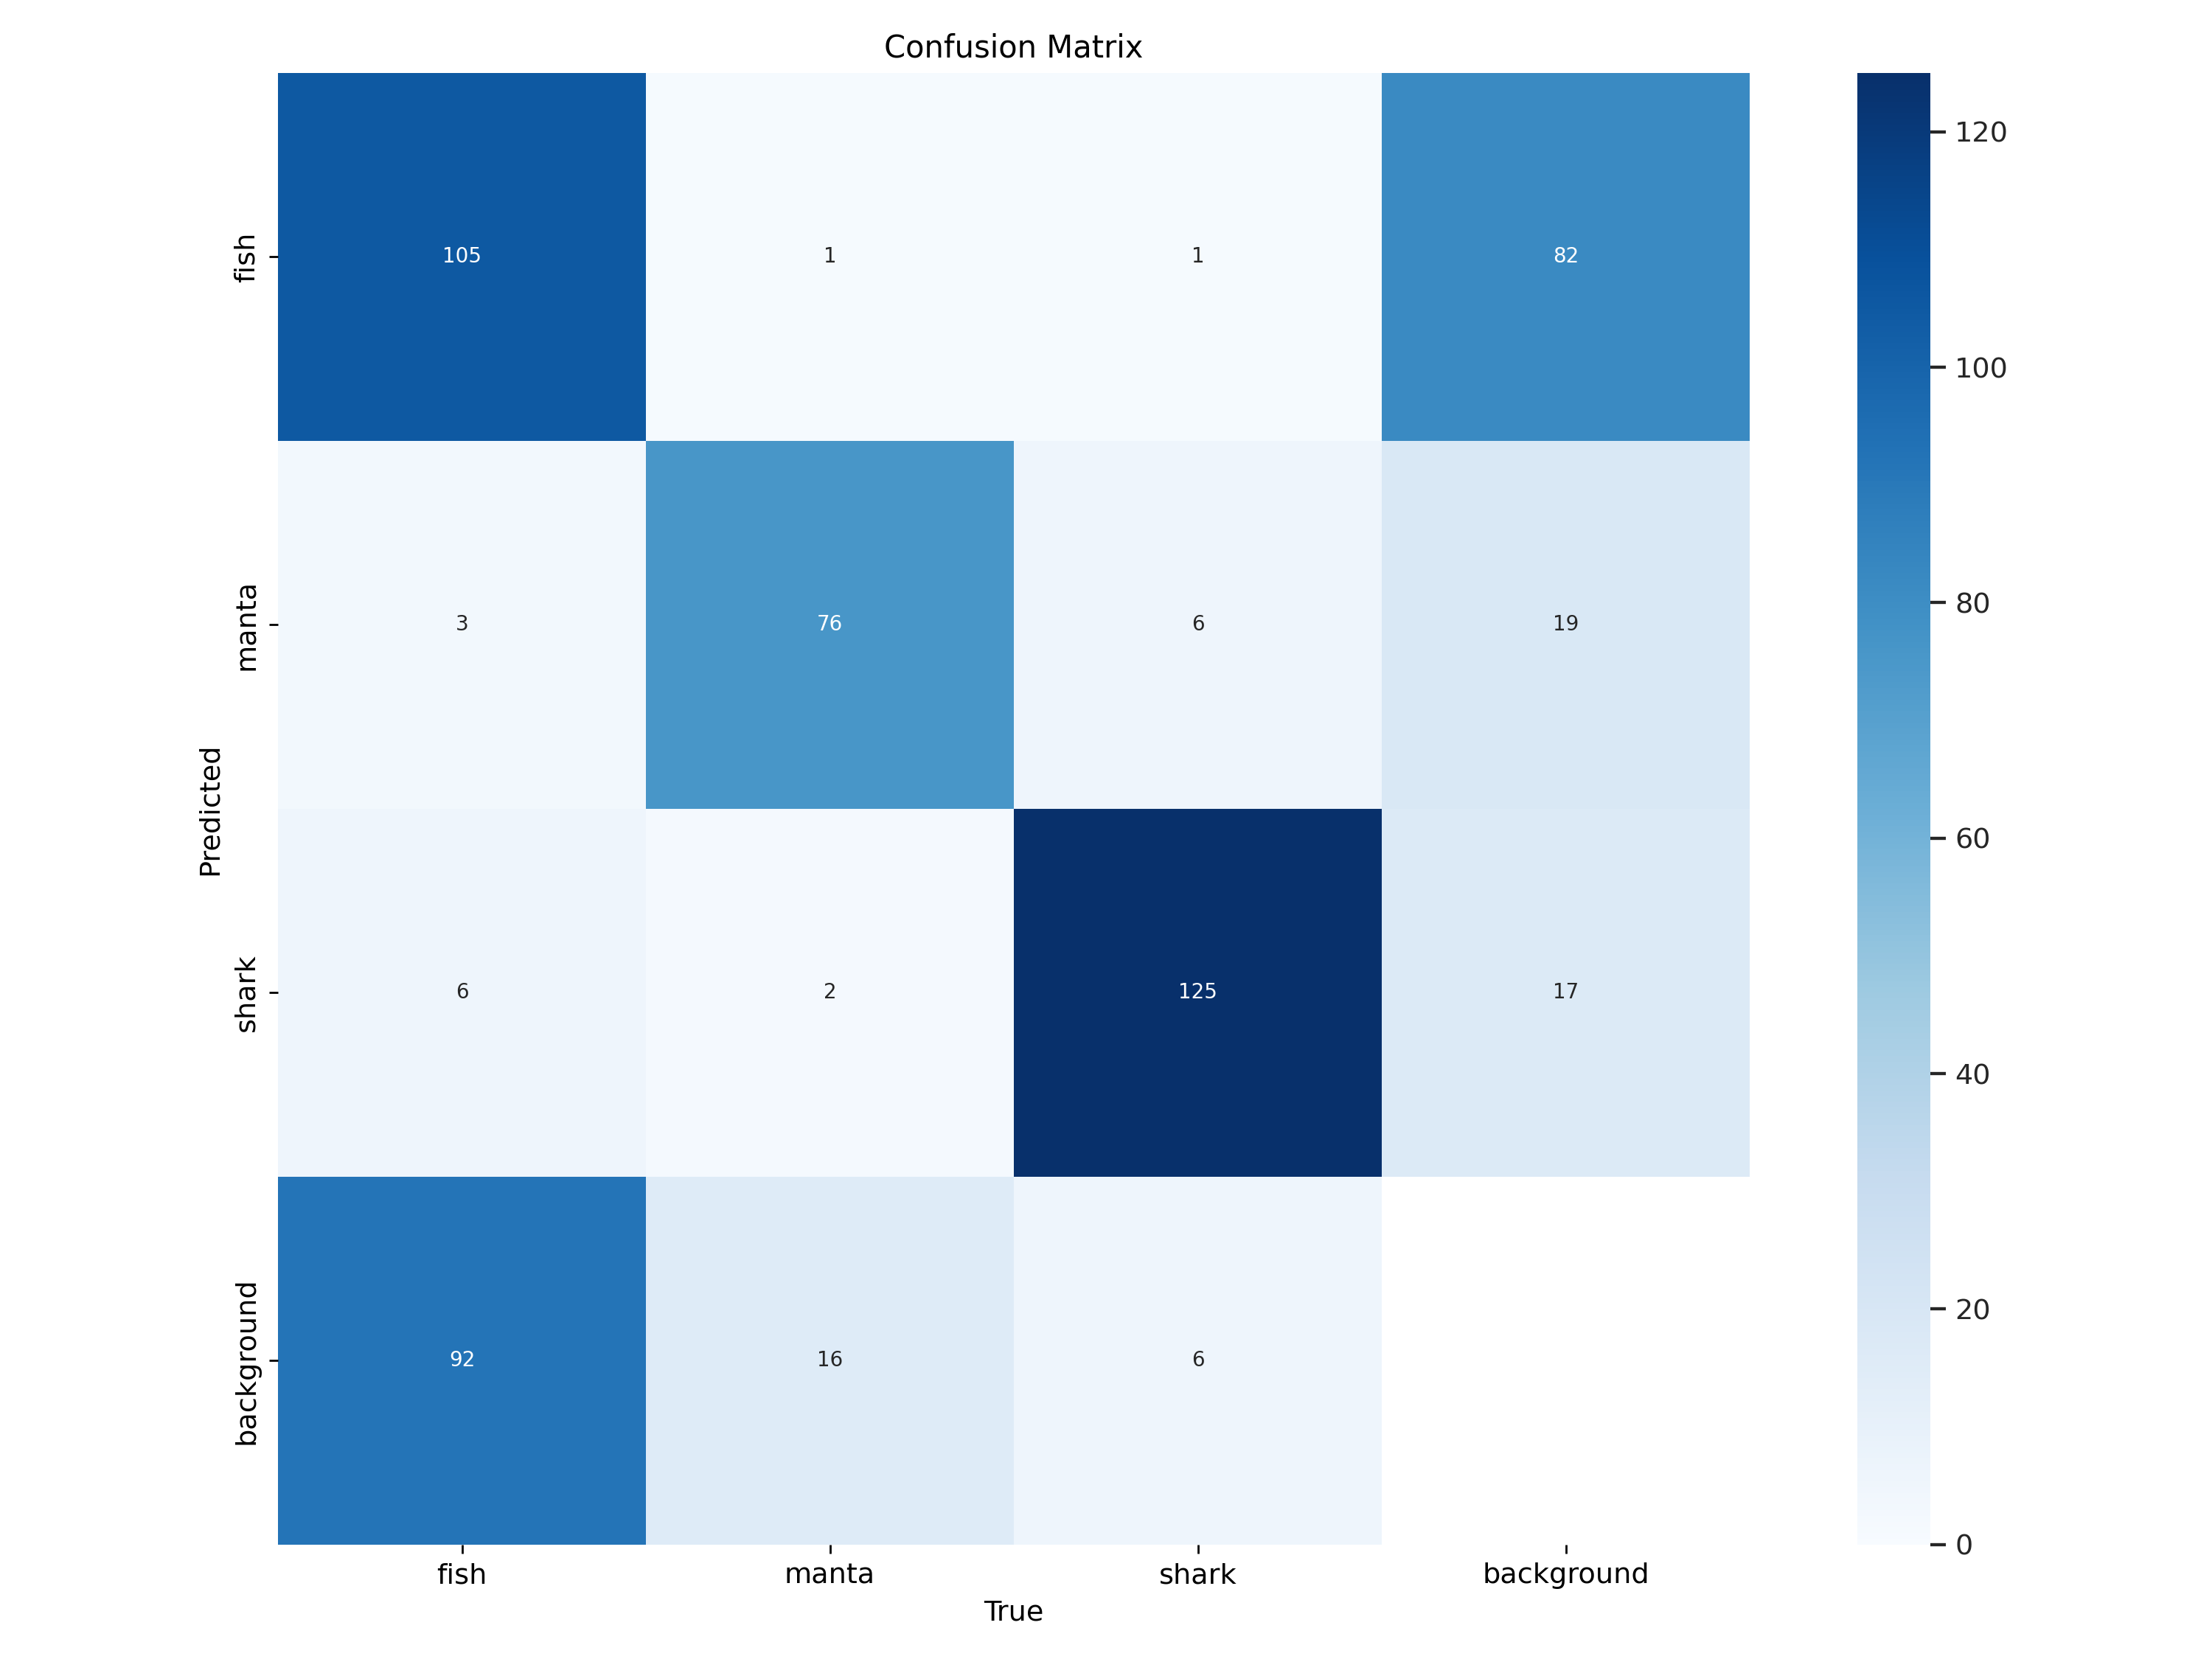

In [9]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

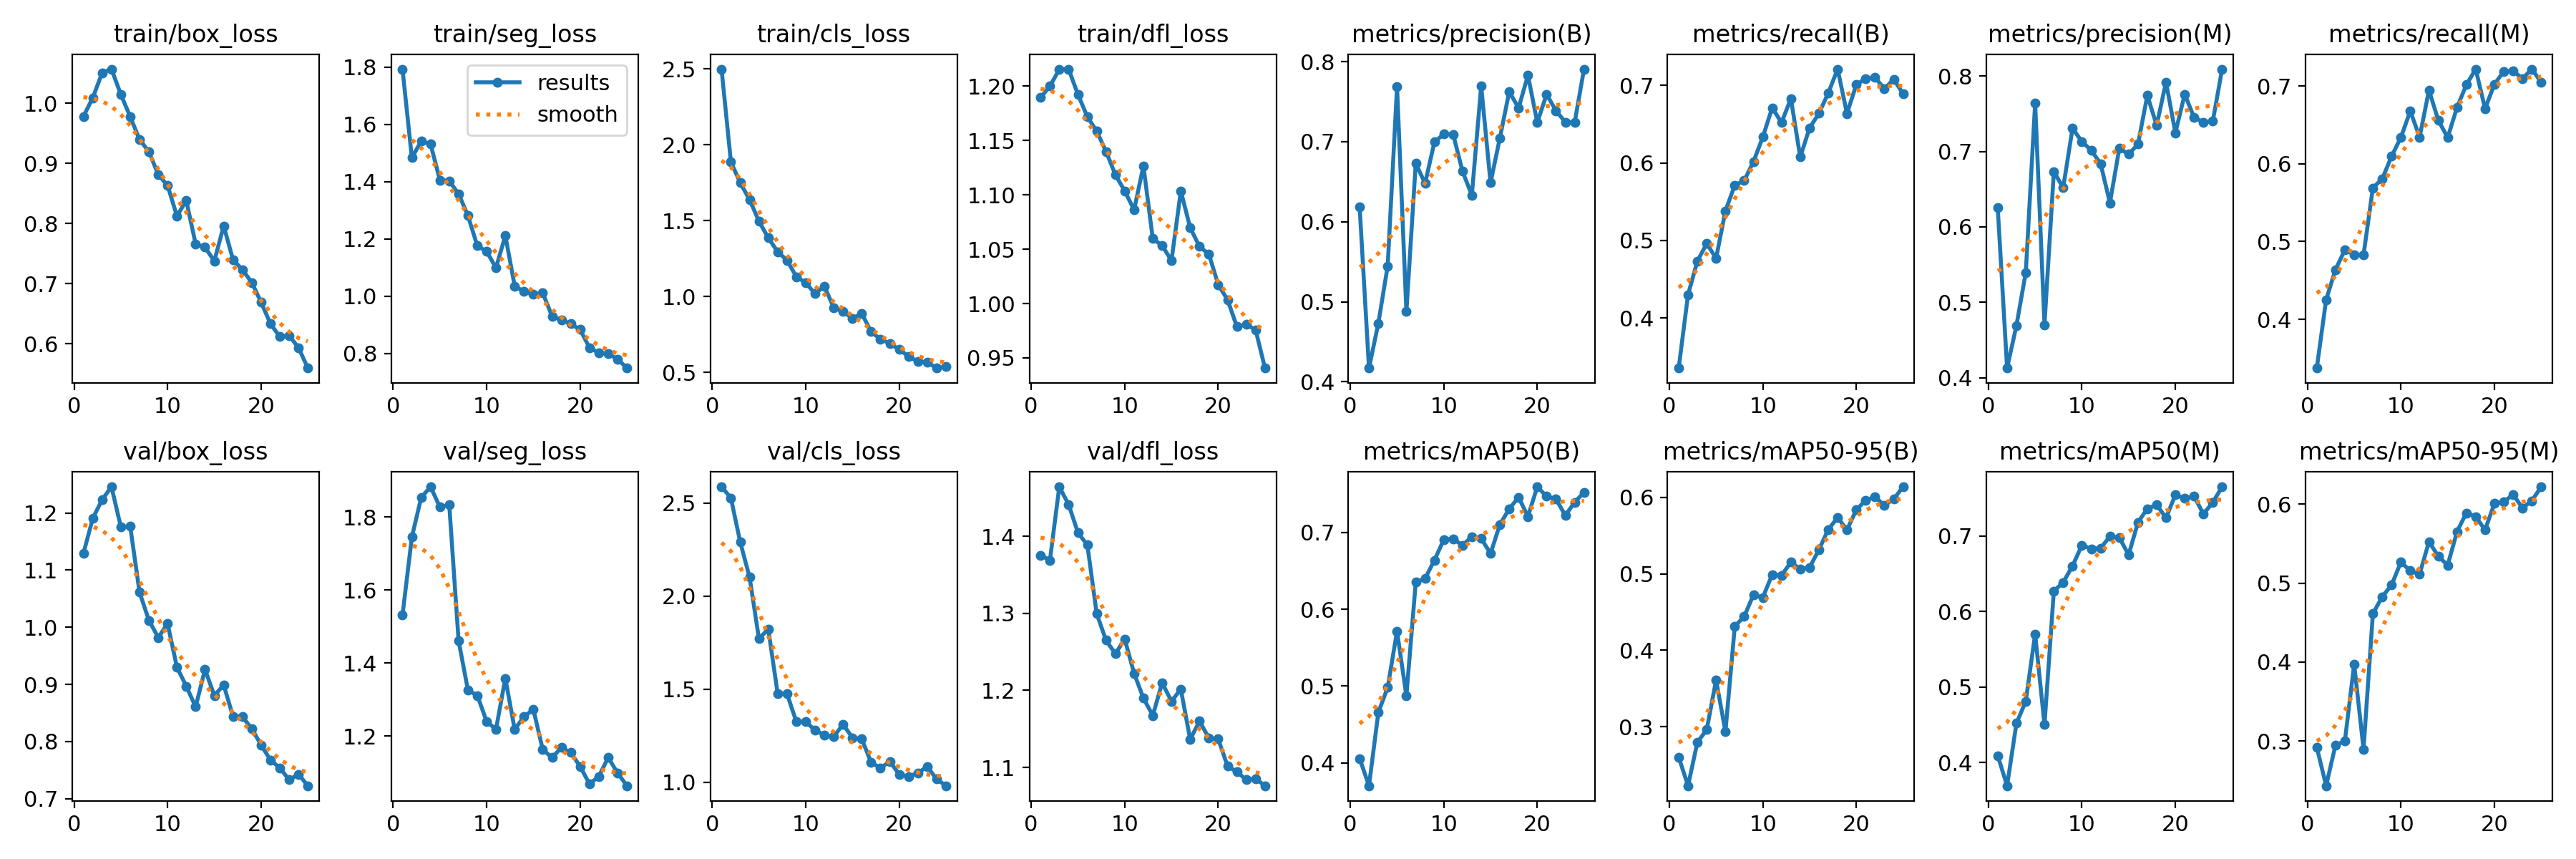

In [10]:
Image(filename=f'runs/segment/train/results.png', width=600)

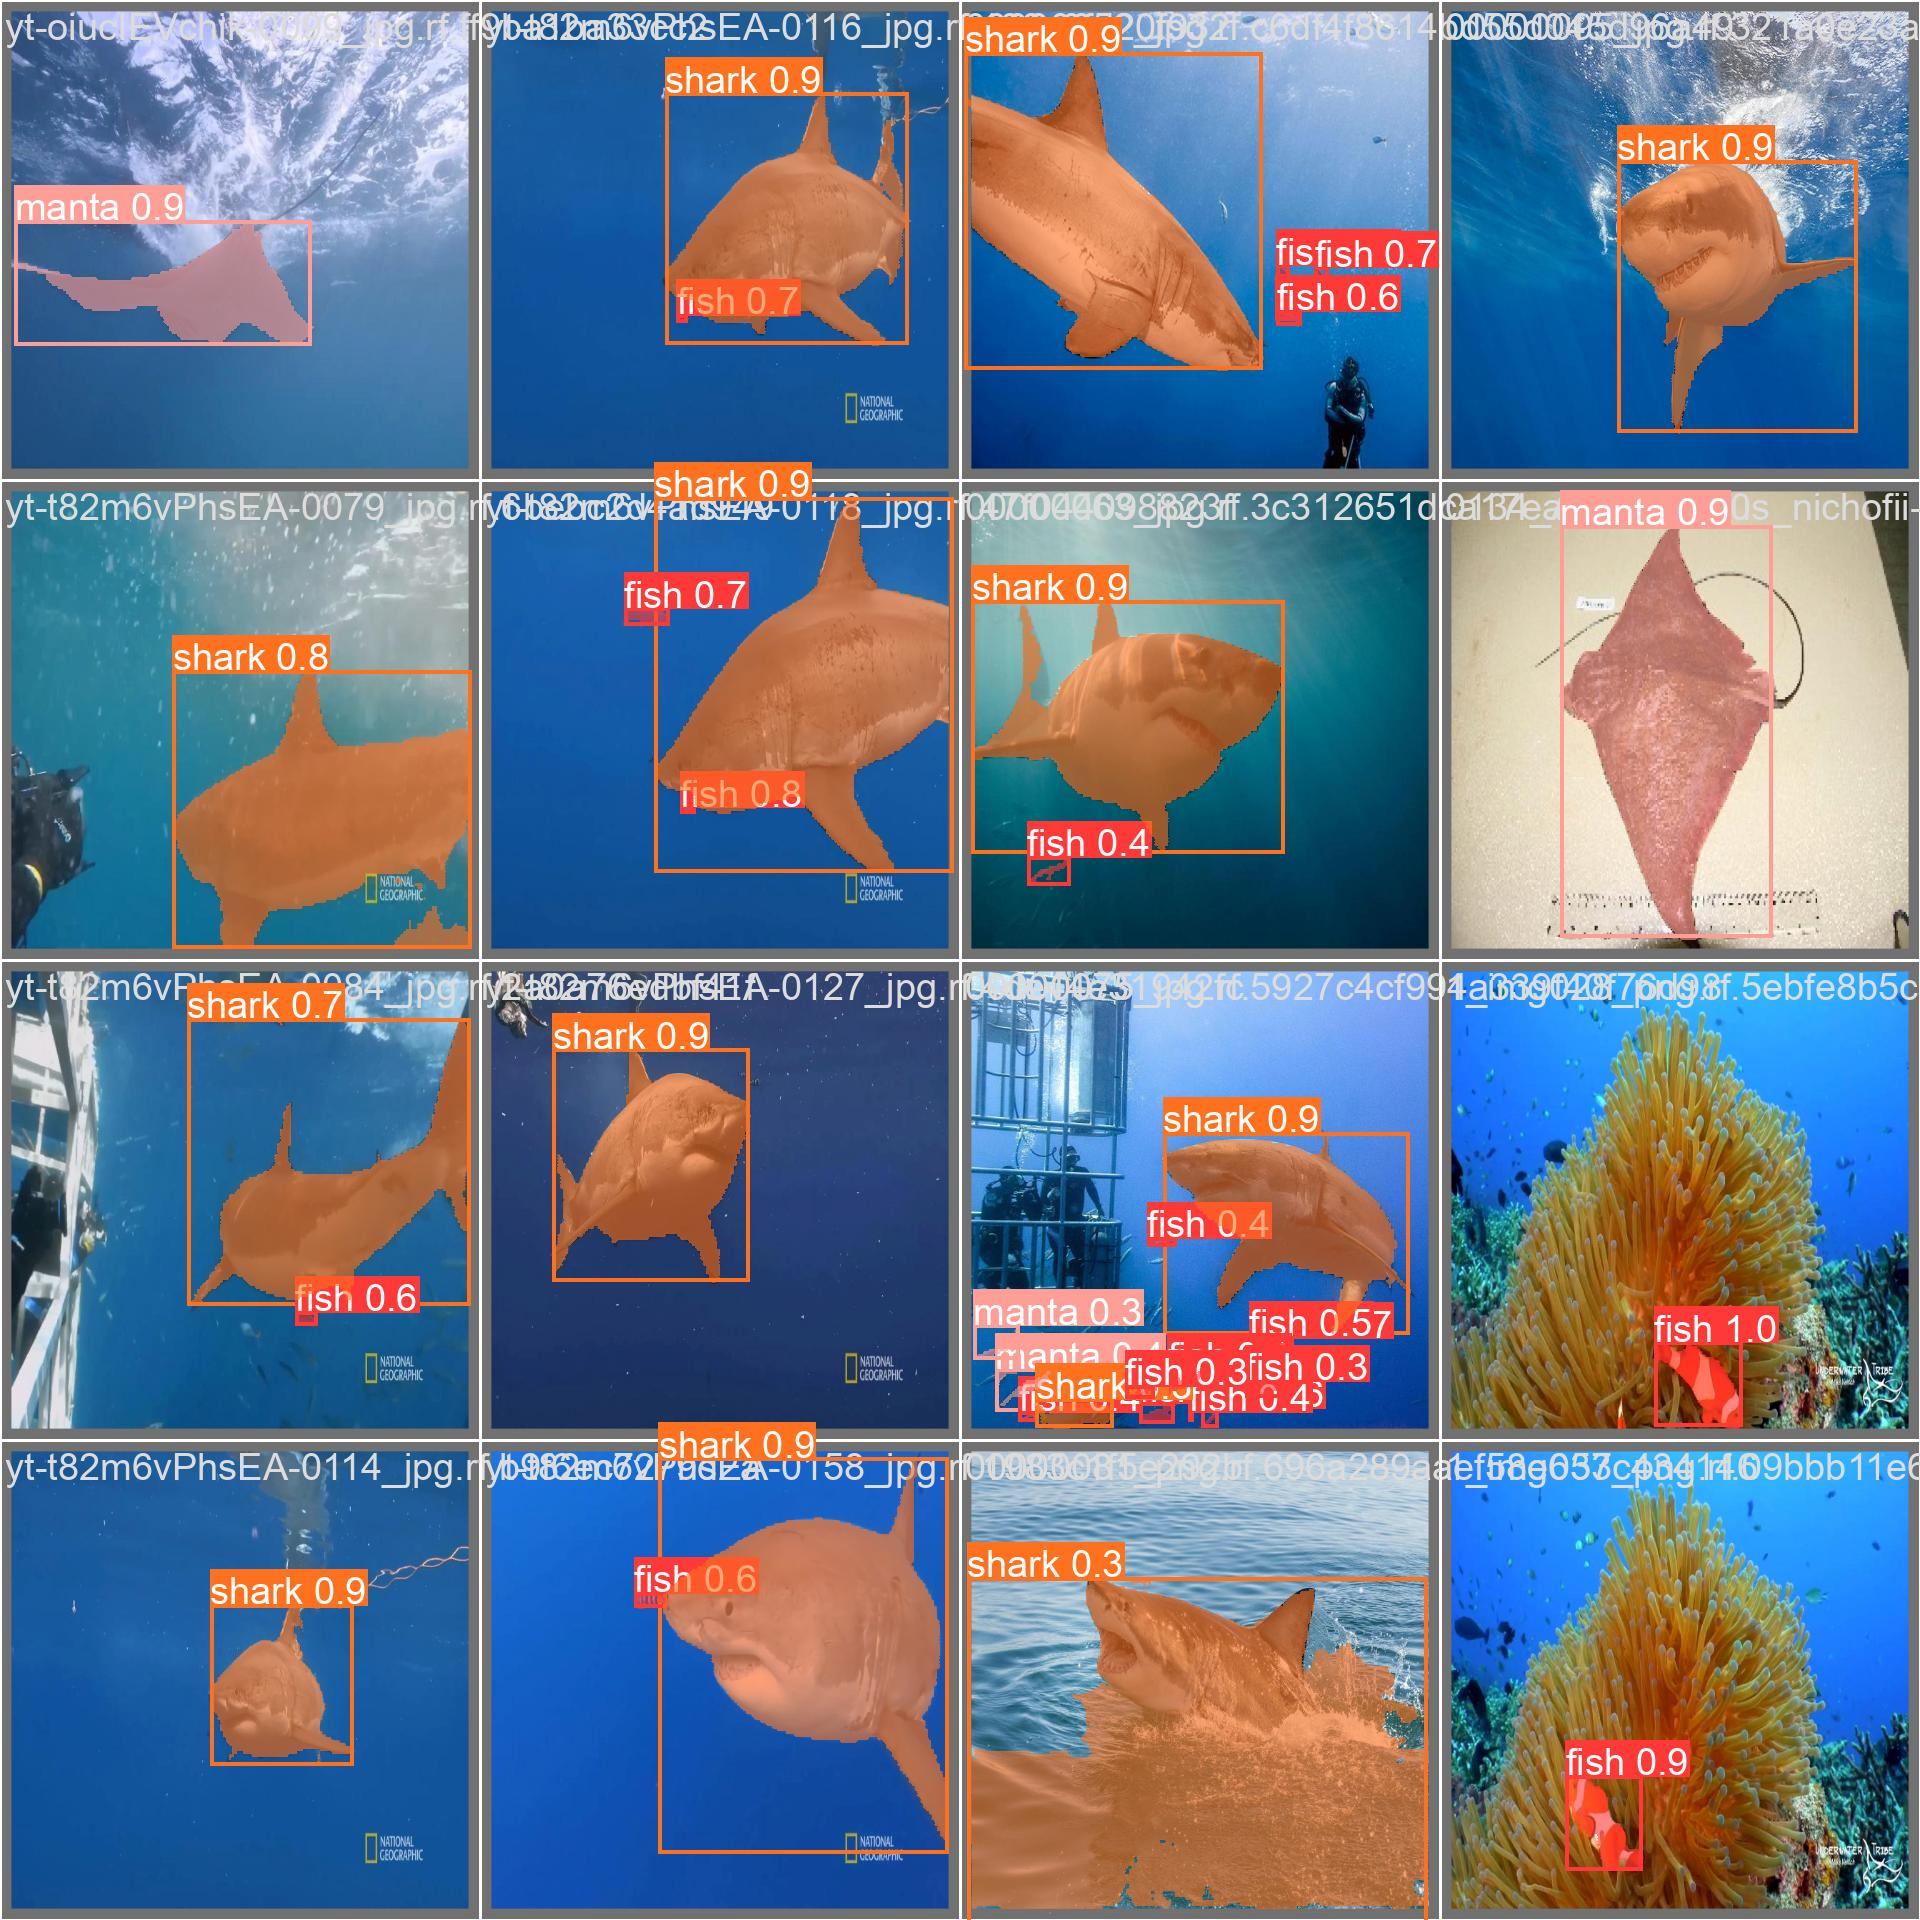

In [12]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

In [13]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=/content/fish-19/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/fish-19/valid/labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 13/13 [00:08<00:00,  1.54it/s]
                   all        200        439       0.79      0.689      0.752      0.613       0.81      0.705      0.765       0.62
                  fish        200        206      0.683      0.427      0.539      0.388      0.696      0.433      0.543      0.376
                 manta        200         95      0.811      0.758      0.777       0.61      0.856        0.8      0.813      0.689
                 shark        200        138      0.878      0.883      0.941      0.842      0.878      0.883      0.937      0.794
Spe

In [14]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=/content/fish-19/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs

image 1/150 /content/fish-19/test/images/00000047_jpg.rf.a115a64838358e724478bea6898f6c73.jpg: 640x640 1 shark, 12.4ms
image 2/150 /content/fish-19/test/images/00000061_jpg.rf.74376f151f9ebacabba8014aedd2e48d.jpg: 640x640 3 fishs, 1 shark, 9.4ms
image 3/150 /content/fish-19/test/images/00000065_jpg.rf.1cd34ad80ce90f55ff8e8710555b0820.jpg: 640x640 1 shark, 9.3ms
image 4/150 /content/fish-19/test/images/00000066_jpg.rf.dc4498602524449225e6ee4b95dbf192.jpg: 640x640 1 shark, 9.3ms
image 5/150 /content/fish-19/test/images/00000115_jpg.rf.712e93f5a5663602ccd9d3a120290978.jpg: 640x640 31 fishs, 1 shark, 9.3ms
image 6/150 /content/fish-19/test/images/00000117_jpg.rf.72b49a3b1bcd2ca07daaf8548a10da0c.jpg: 640x640 1 shark, 9.3ms
image 7/150 /content/fish-19/test/images/00000129_jpg.rf.167b7c215b98dc3e7926c549785bb959.jpg: 64

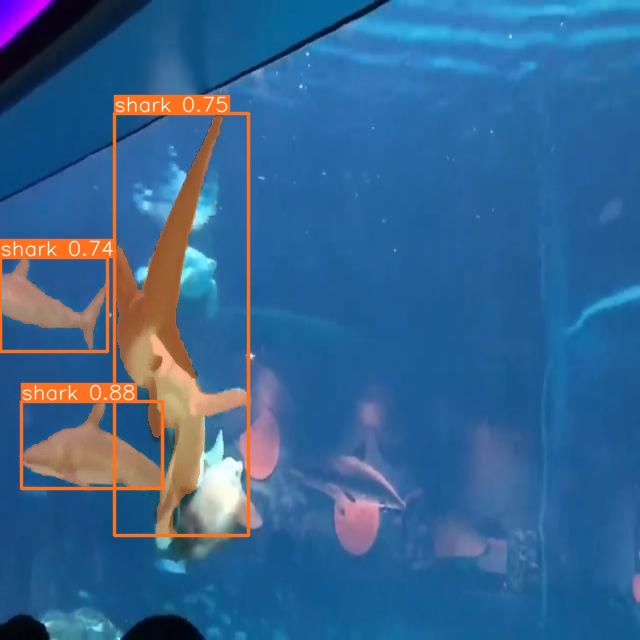

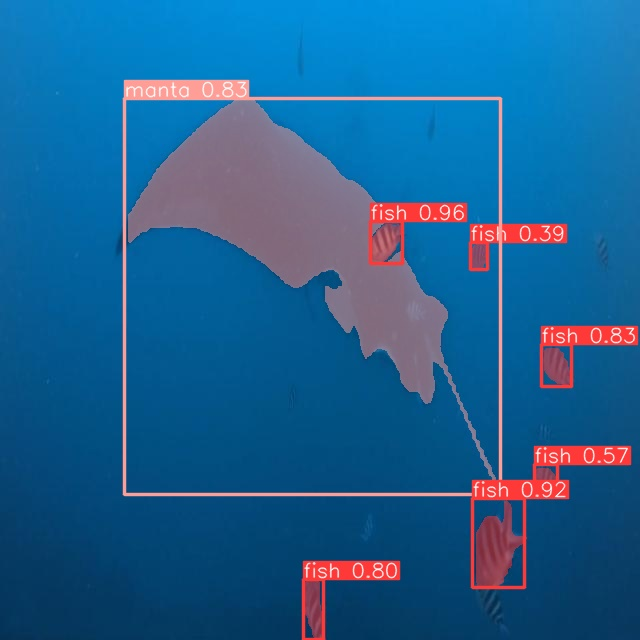

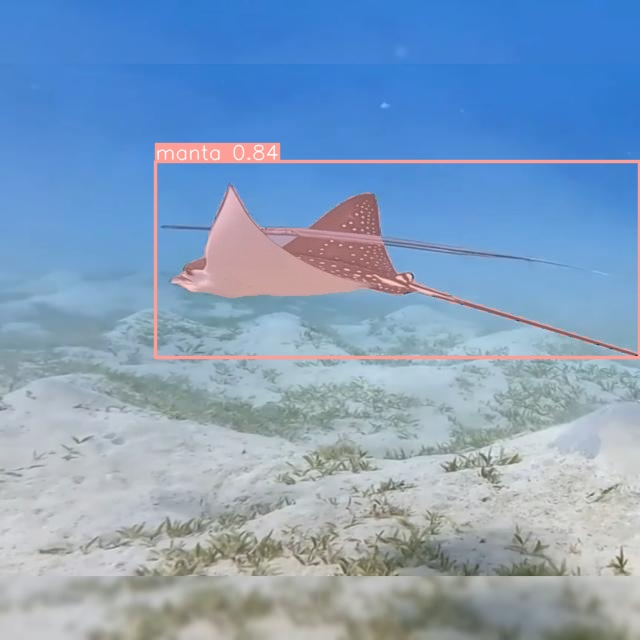

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[2:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [16]:
!yolo task=segment mode=train model=runs/segment/train/weights/best.pt data=/content/fish-19/data.yaml epochs=25 imgsz=640 plots=True

New https://pypi.org/project/ultralytics/8.1.34 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=runs/segment/train/weights/best.pt, data=/content/fish-19/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=

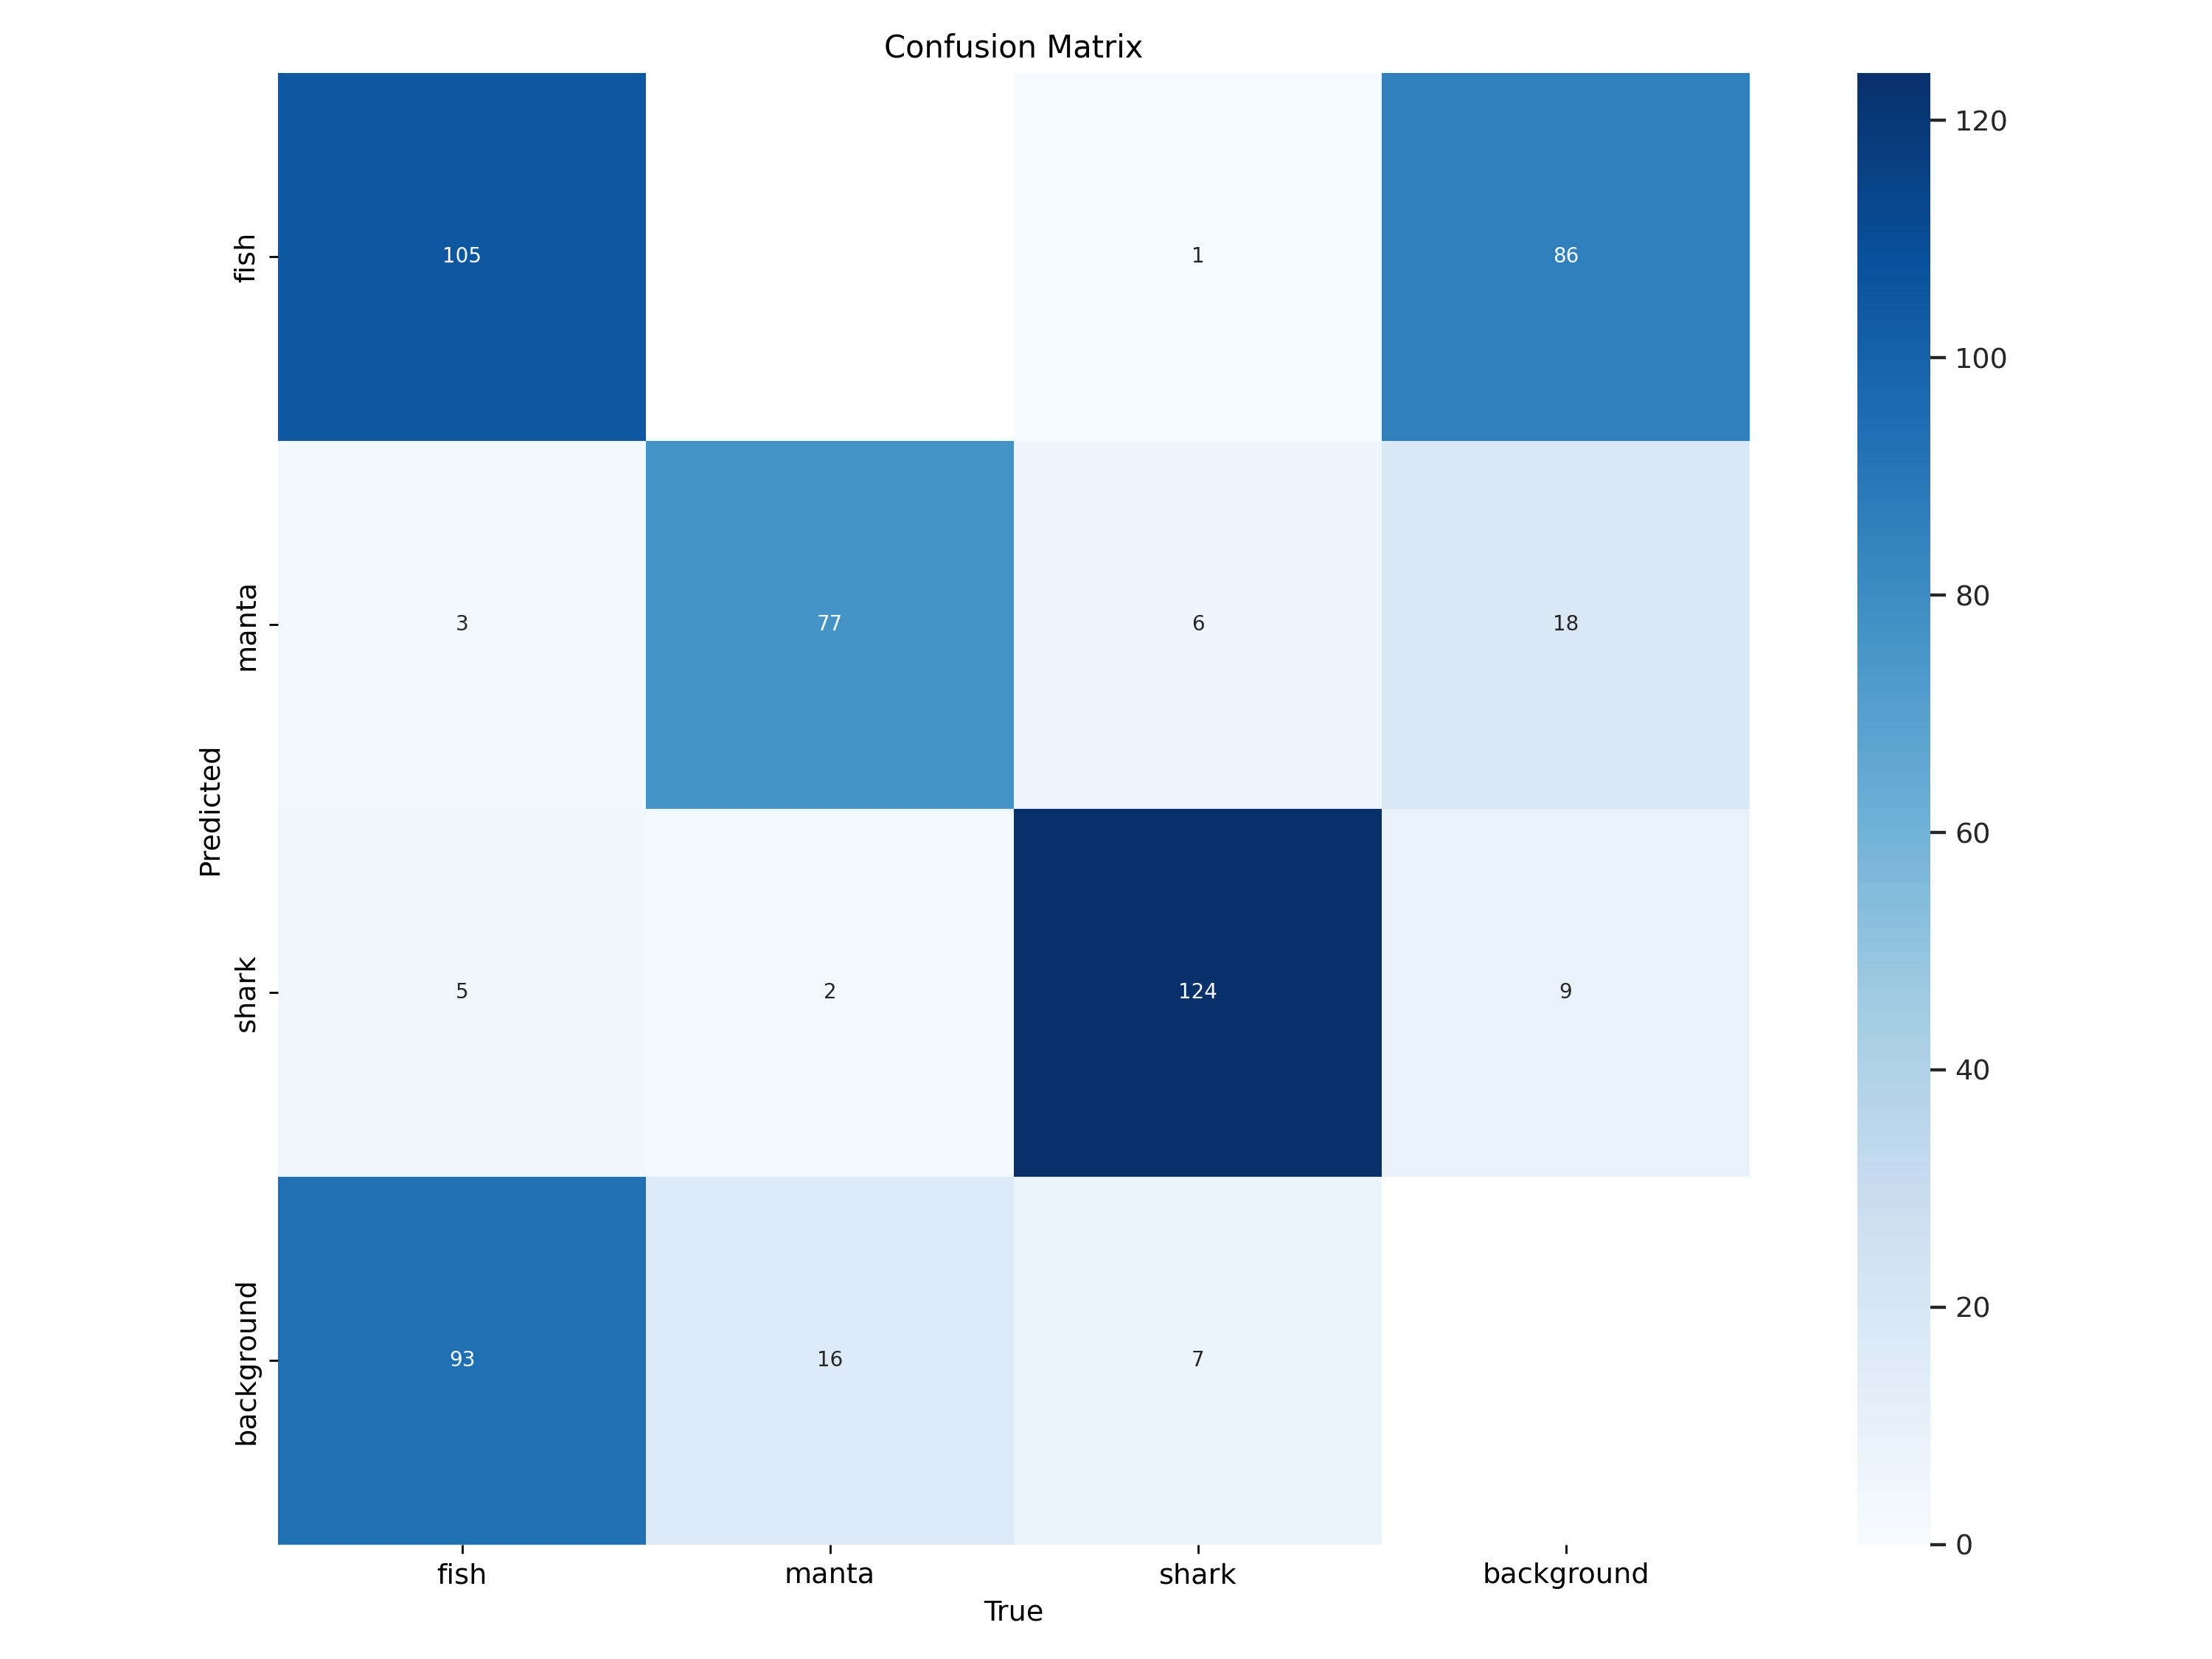

In [18]:
Image(filename=f'runs/segment/train2/confusion_matrix.png', width=600)

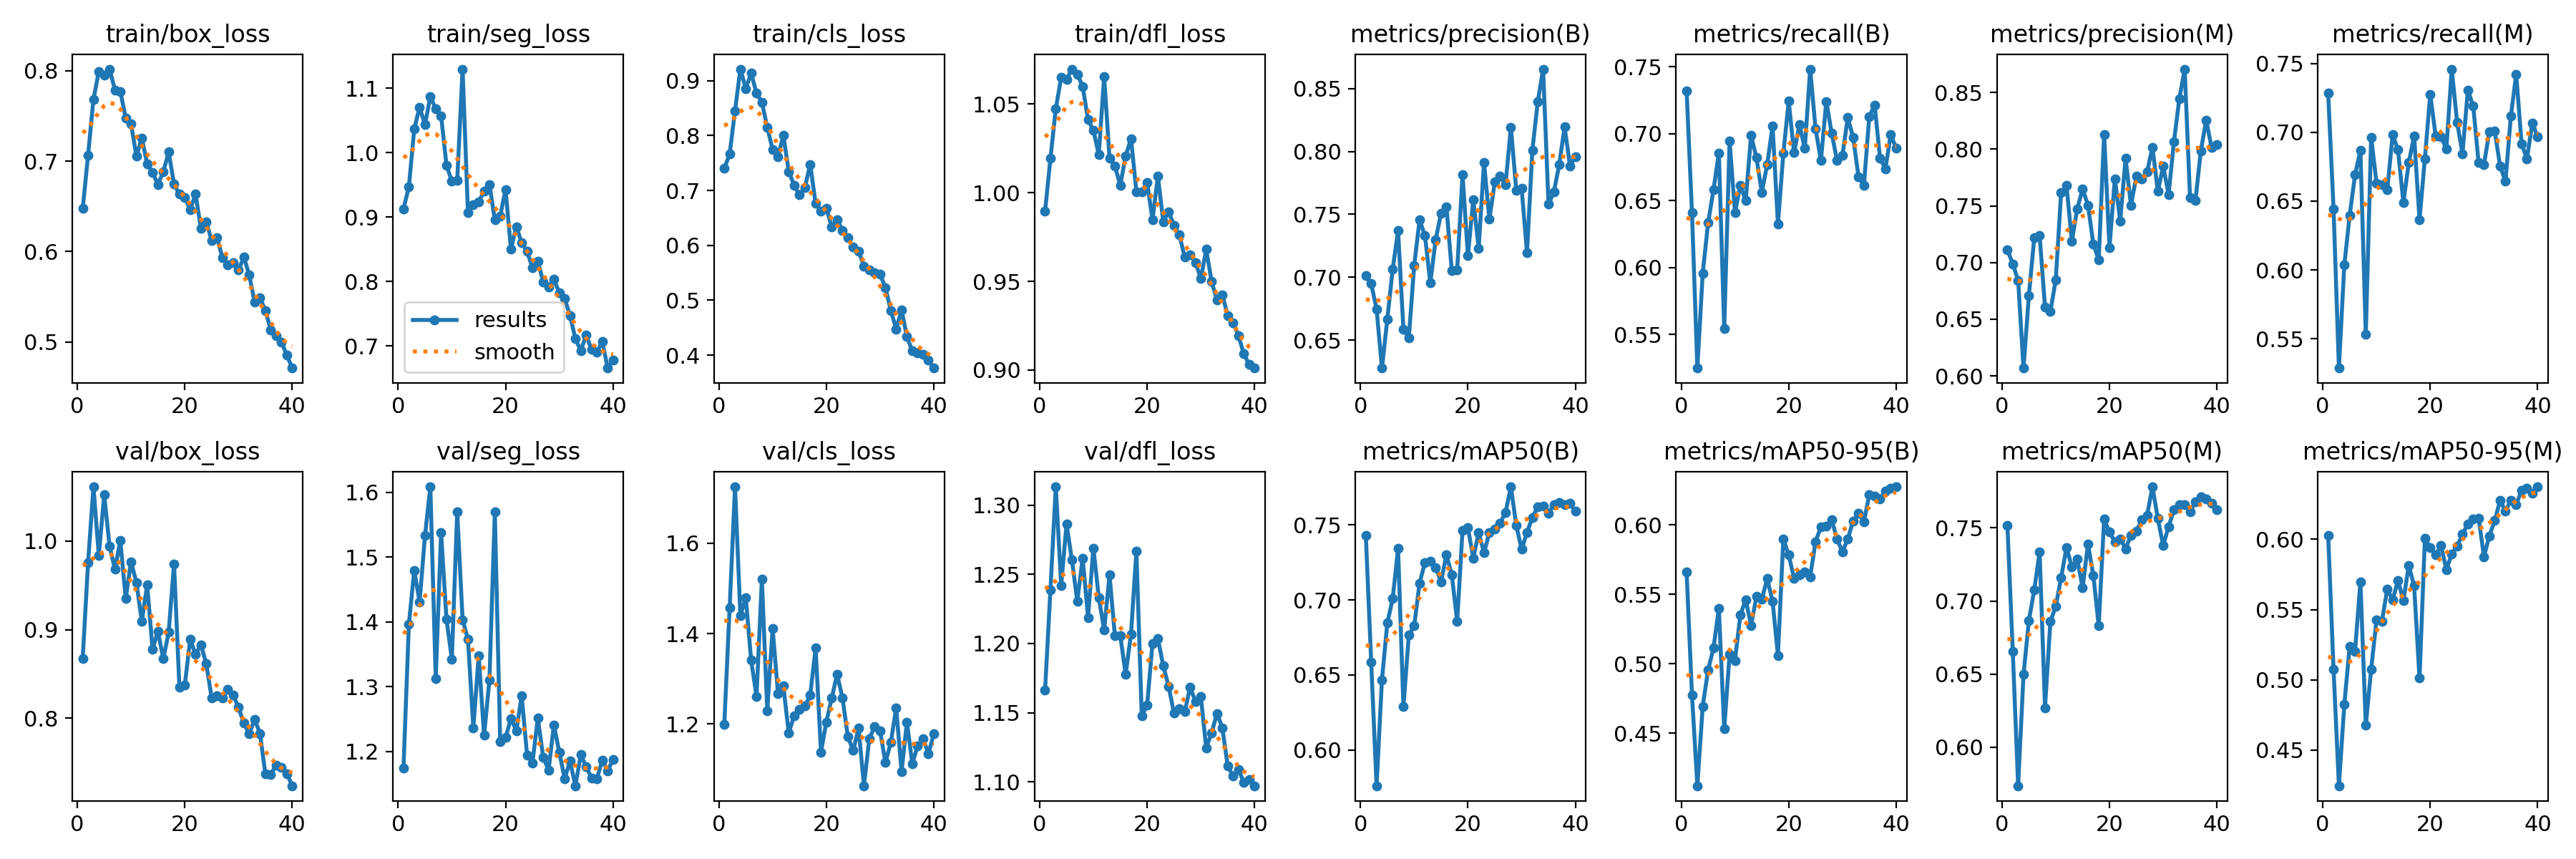

In [ ]:
Image(filename=f'runs/segment/train2/results.png', width=600)

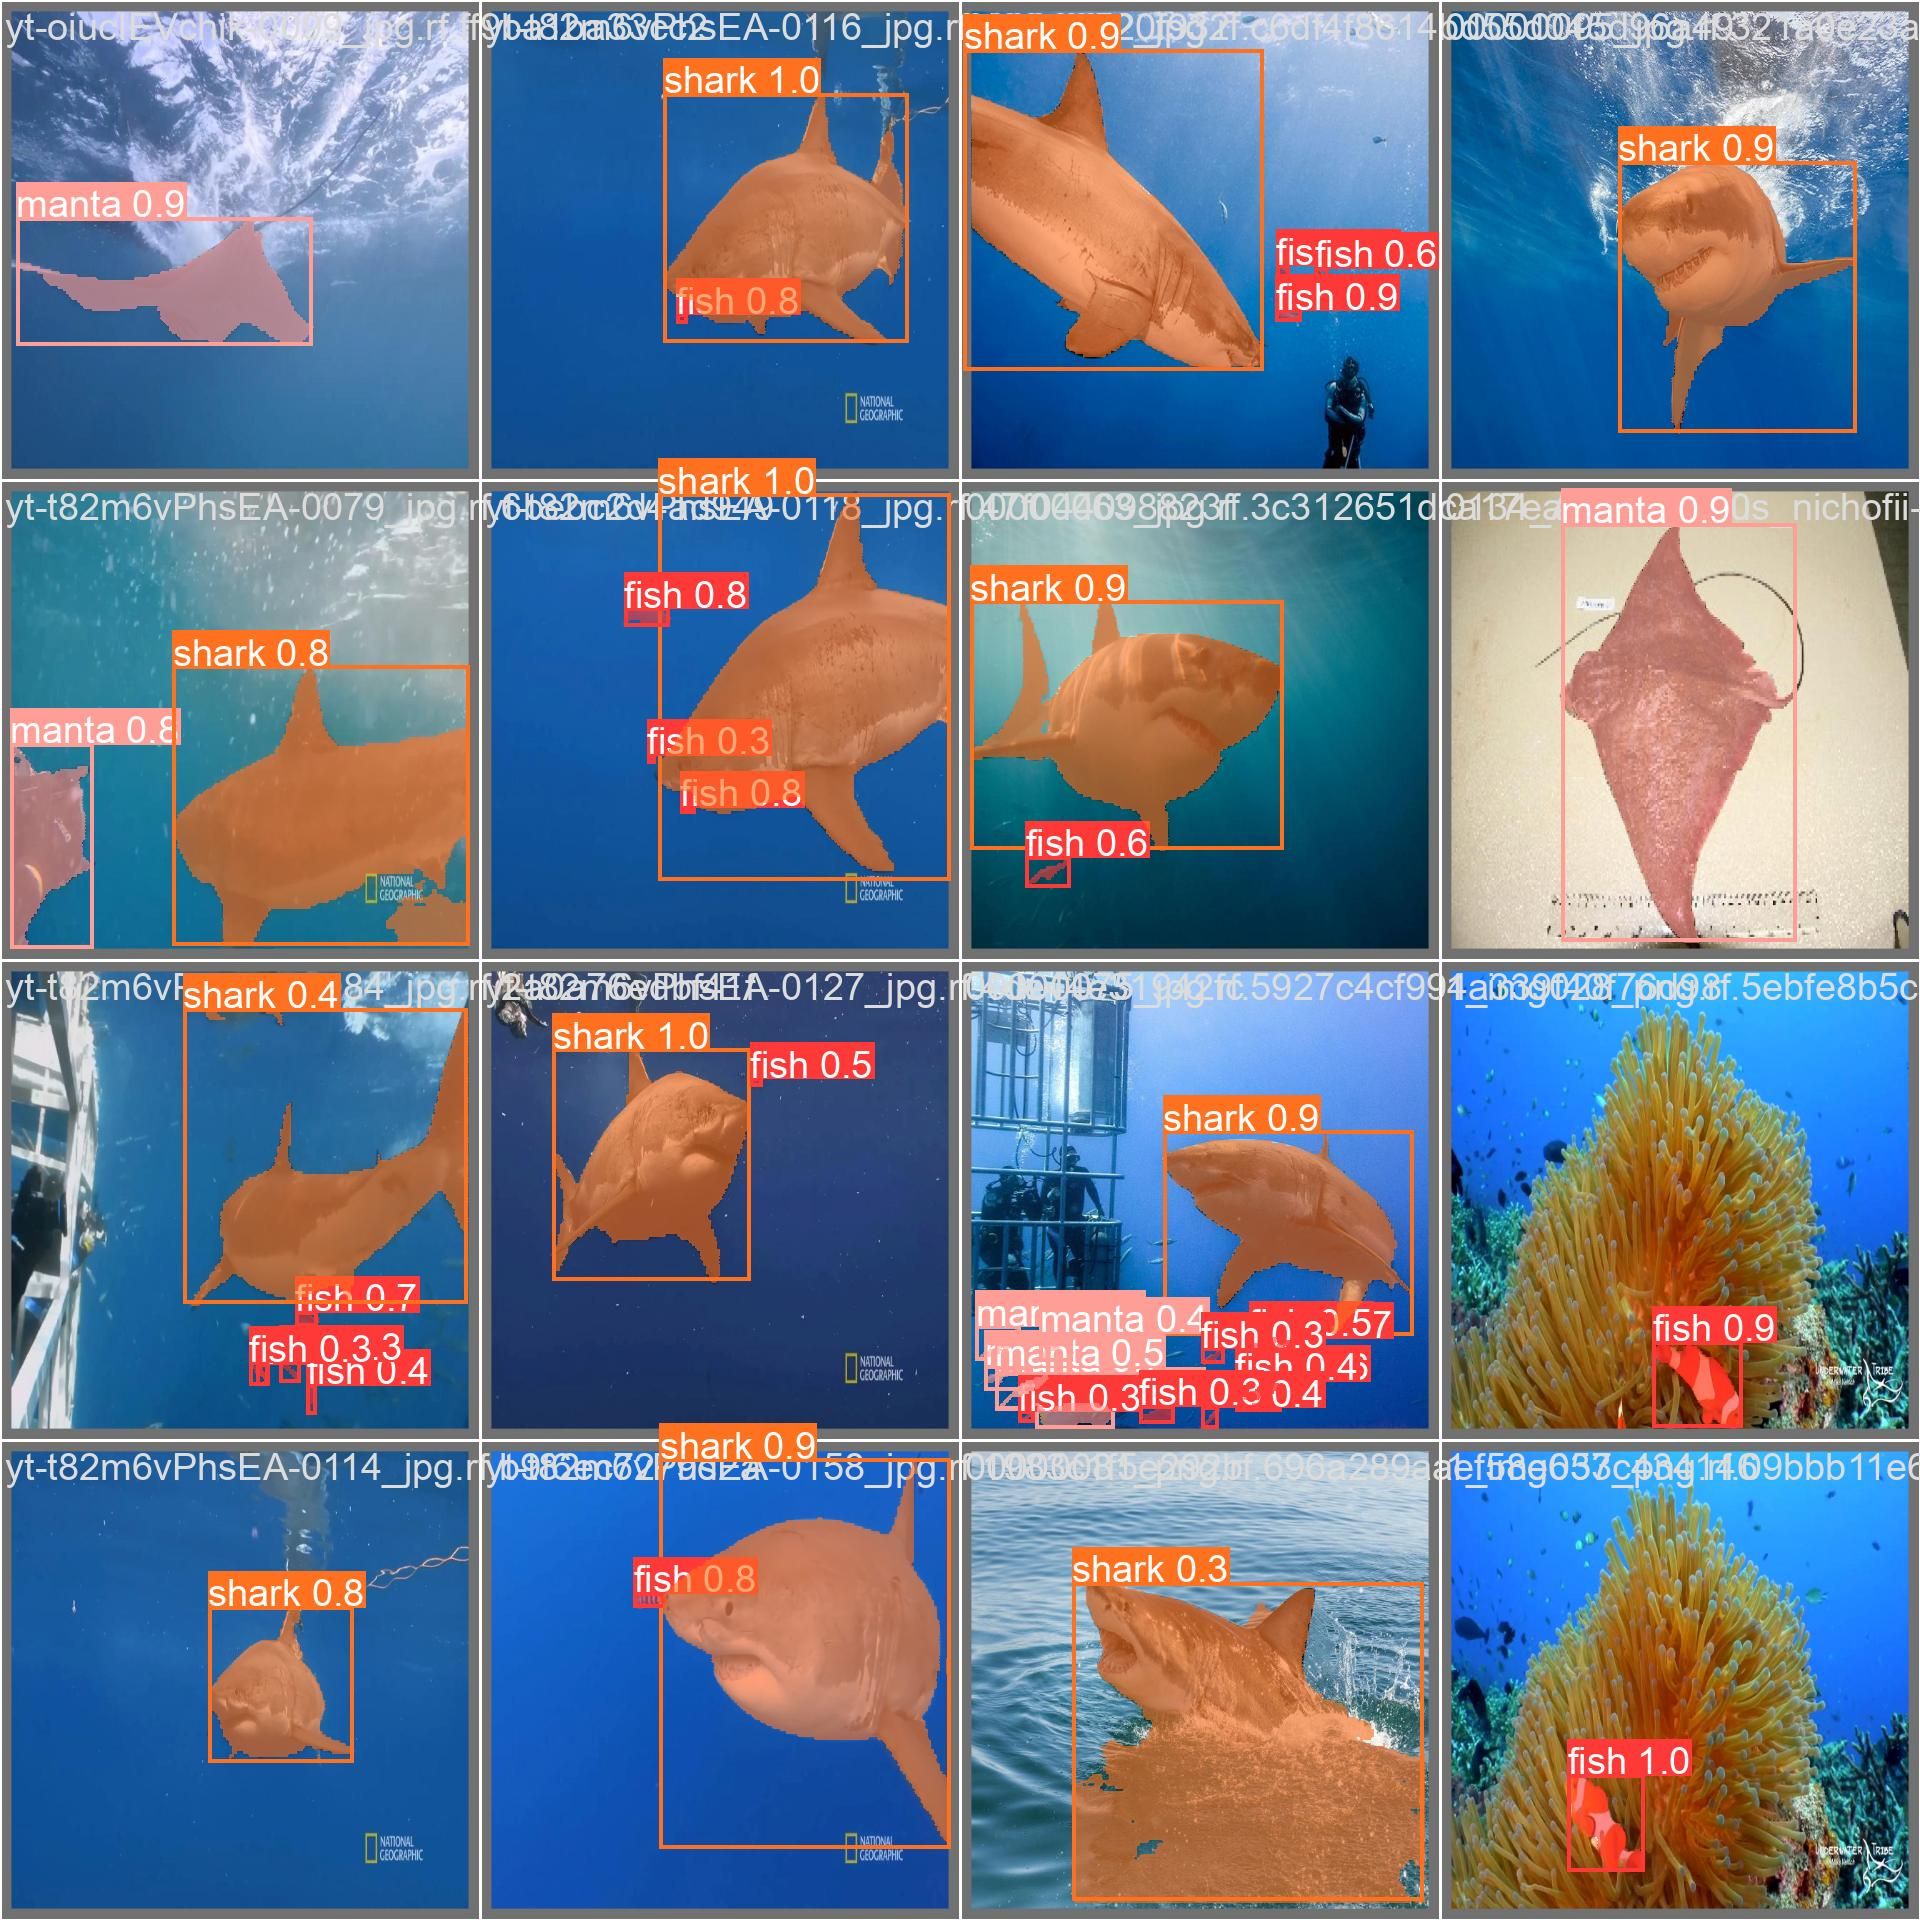

In [19]:
Image(filename=f'runs/segment/train2/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=segment mode=val model=runs/segment/train6/weights/best.pt data=/content/fish-19/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/fish-19/valid/labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 13/13 [00:09<00:00,  1.43it/s]
                   all        200        439      0.776      0.707      0.759      0.631      0.783       0.71      0.767      0.629
                  fish        200        206      0.612      0.437      0.544      0.398      0.627      0.442      0.556      0.376
                 manta        200         95      0.814        0.8      0.803       0.65      0.827      0.811      0.827      0.712
                 shark        200        138      0.901      0.884      0.929      0.847      0.895      0.877      0.919        0.8
Spe

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs

image 1/150 /content/fish-19/test/images/00000047_jpg.rf.a115a64838358e724478bea6898f6c73.jpg: 640x640 1 shark, 13.4ms
image 2/150 /content/fish-19/test/images/00000061_jpg.rf.74376f151f9ebacabba8014aedd2e48d.jpg: 640x640 3 fishs, 1 shark, 9.5ms
image 3/150 /content/fish-19/test/images/00000065_jpg.rf.1cd34ad80ce90f55ff8e8710555b0820.jpg: 640x640 1 shark, 9.3ms
image 4/150 /content/fish-19/test/images/00000066_jpg.rf.dc4498602524449225e6ee4b95dbf192.jpg: 640x640 1 shark, 9.3ms
image 5/150 /content/fish-19/test/images/00000115_jpg.rf.712e93f5a5663602ccd9d3a120290978.jpg: 640x640 27 fishs, 1 shark, 9.3ms
image 6/150 /content/fish-19/test/images/00000117_jpg.rf.72b49a3b1bcd2ca07daaf8548a10da0c.jpg: 640x640 1 shark, 13.3ms
image 7/150 /content/fish-19/test/images/00000129_jpg.rf.167b7c215b98dc3e7926c549785bb959.jpg: 6

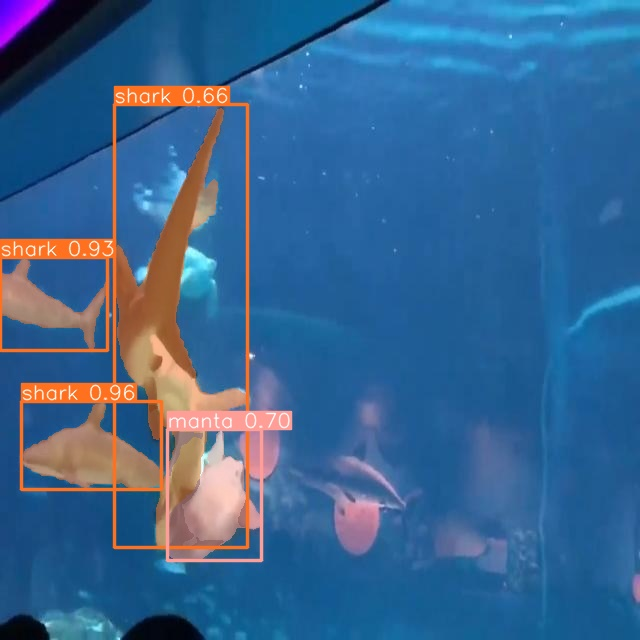

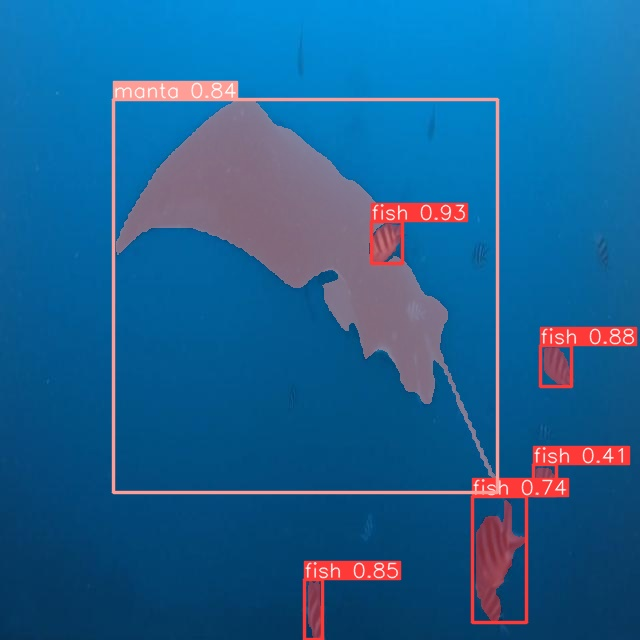

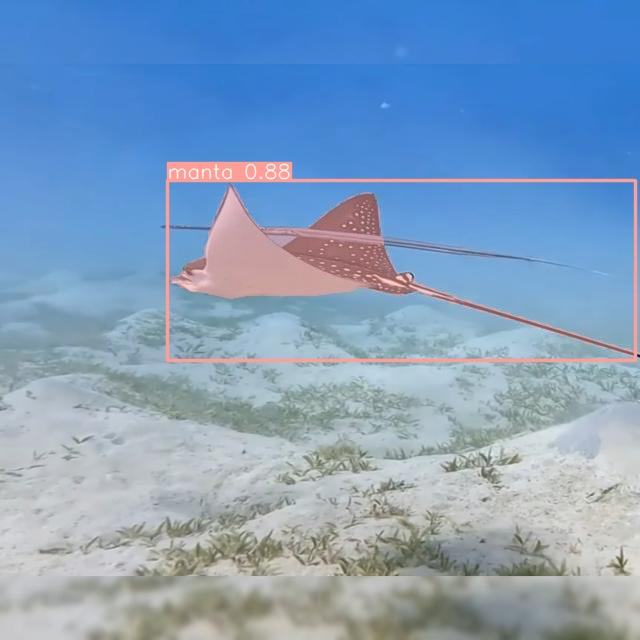

In [22]:
!yolo task=segment mode=predict model=runs/segment/train2/weights/best.pt conf=0.25 source=/content/fish-19/test/images save=True
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict2/*.jpg')[2:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict2/*.jpg')[2:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo predict \
model='runs/segment/train2/weights/best.pt' \
source='/content/5153e324-4746-4871-885e-f45e9ef758e9.mp4' \
name='video' \
exist_ok=True \
save=True

/bin/bash: line 1: yolo: command not found
